In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
data = pd.read_csv('databreaches650.csv')

In [3]:
data

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26 23:35:45,2017-12-10 21:44:27,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False
1,123RF,123RF,123rf.com,2020-03-22,2020-11-15 00:59:50,2020-11-15 01:07:10,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False
2,126,126,126.com,2012-01-01,2016-10-08 07:46:05,2016-10-08 07:46:05,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False
3,17Media,17,17app.co,2016-04-19,2016-07-08 01:55:03,2016-07-08 01:55:03,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",True,False,False,False,False,False
4,17173,17173,17173.com,2011-12-28,2018-04-28 04:53:15,2018-04-28 04:53:15,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,Zurich,Zurich,zurich.co.jp,2023-01-08,2023-01-22 22:30:56,2023-01-22 22:30:56,756737,"In January 2023, <a href=""https://therecord.me...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",True,False,False,False,False,False
646,Zynga,Zynga,zynga.com,2019-09-01,2019-12-19 04:54:45,2020-01-11 00:41:51,172869660,"In September 2019, game developer <a href=""htt...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Phone number...",True,False,False,False,False,False
647,Parapa,ÐŸÐ°Ñ€Ð° ÐŸÐ°,parapa.mail.ru,2016-08-08,2016-12-28 07:03:17,2016-12-28 07:03:17,4946850,"In August 2016, <a href=""http://www.zdnet.com/...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",True,False,False,False,False,False
648,SprashivaiRu,Ð¡Ð¿Ñ€Ð°ÑˆÐ¸Ð²Ð°Ð¹.Ñ€Ñƒ,sprashivai.ru,2015-05-11,2015-05-12 23:50:08,2015-05-12 23:50:08,3474763,"In May 2015, <a href=""http://sprashivai.ru/"" t...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",True,False,False,False,False,False


In [5]:
df= pd.DataFrame(data)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          650 non-null    object
 1   Title         650 non-null    object
 2   Domain        624 non-null    object
 3   BreachDate    650 non-null    object
 4   AddedDate     650 non-null    object
 5   ModifiedDate  650 non-null    object
 6   PwnCount      650 non-null    int64 
 7   Description   650 non-null    object
 8   LogoPath      650 non-null    object
 9   DataClasses   650 non-null    object
 10  IsVerified    650 non-null    bool  
 11  IsFabricated  650 non-null    bool  
 12  IsSensitive   650 non-null    bool  
 13  IsRetired     650 non-null    bool  
 14  IsSpamList    650 non-null    bool  
 15  IsMalware     650 non-null    bool  
dtypes: bool(6), int64(1), object(9)
memory usage: 54.7+ KB
None


In [6]:
data.isnull().sum()

Name             0
Title            0
Domain          26
BreachDate       0
AddedDate        0
ModifiedDate     0
PwnCount         0
Description      0
LogoPath         0
DataClasses      0
IsVerified       0
IsFabricated     0
IsSensitive      0
IsRetired        0
IsSpamList       0
IsMalware        0
dtype: int64

In [7]:
data.dropna()
data.fillcompany_type

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26 23:35:45,2017-12-10 21:44:27,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False
1,123RF,123RF,123rf.com,2020-03-22,2020-11-15 00:59:50,2020-11-15 01:07:10,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False
2,126,126,126.com,2012-01-01,2016-10-08 07:46:05,2016-10-08 07:46:05,6414191,"In approximately 2012, it's alleged that the C...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords']",False,False,False,False,False,False
3,17Media,17,17app.co,2016-04-19,2016-07-08 01:55:03,2016-07-08 01:55:03,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",True,False,False,False,False,False
4,17173,17173,17173.com,2011-12-28,2018-04-28 04:53:15,2018-04-28 04:53:15,7485802,"In late 2011, <a href=""https://news.softpedia....",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,Zurich,Zurich,zurich.co.jp,2023-01-08,2023-01-22 22:30:56,2023-01-22 22:30:56,756737,"In January 2023, <a href=""https://therecord.me...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",True,False,False,False,False,False
646,Zynga,Zynga,zynga.com,2019-09-01,2019-12-19 04:54:45,2020-01-11 00:41:51,172869660,"In September 2019, game developer <a href=""htt...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Phone number...",True,False,False,False,False,False
647,Parapa,ÐŸÐ°Ñ€Ð° ÐŸÐ°,parapa.mail.ru,2016-08-08,2016-12-28 07:03:17,2016-12-28 07:03:17,4946850,"In August 2016, <a href=""http://www.zdnet.com/...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",True,False,False,False,False,False
648,SprashivaiRu,Ð¡Ð¿Ñ€Ð°ÑˆÐ¸Ð²Ð°Ð¹.Ñ€Ñƒ,sprashivai.ru,2015-05-11,2015-05-12 23:50:08,2015-05-12 23:50:08,3474763,"In May 2015, <a href=""http://sprashivai.ru/"" t...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",True,False,False,False,False,False


In [8]:
data = data[data['IsVerified'] != False]

data

,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26 23:35:45,2017-12-10 21:44:27,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False
1,123RF,123RF,123rf.com,2020-03-22,2020-11-15 00:59:50,2020-11-15 01:07:10,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False
3,17Media,17,17app.co,2016-04-19,2016-07-08 01:55:03,2016-07-08 01:55:03,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",True,False,False,False,False,False
6,2fast4u,2fast4u,2fast4u.be,2017-12-20,2018-01-07 08:19:39,2018-01-07 08:19:39,17706,"In December 2017, the Belgian motorcycle forum...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",True,False,False,False,False,False
7,500px,500px,500px.com,2018-07-05,2019-03-25 08:01:09,2019-03-25 08:01:09,14867999,"In mid-2018, the online photography community ...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,Zurich,Zurich,zurich.co.jp,2023-01-08,2023-01-22 22:30:56,2023-01-22 22:30:56,756737,"In January 2023, <a href=""https://therecord.me...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",True,False,False,False,False,False
646,Zynga,Zynga,zynga.com,2019-09-01,2019-12-19 04:54:45,2020-01-11 00:41:51,172869660,"In September 2019, game developer <a href=""htt...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Phone number...",True,False,False,False,False,False
647,Parapa,ÐŸÐ°Ñ€Ð° ÐŸÐ°,parapa.mail.ru,2016-08-08,2016-12-28 07:03:17,2016-12-28 07:03:17,4946850,"In August 2016, <a href=""http://www.zdnet.com/...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",True,False,False,False,False,False
648,SprashivaiRu,Ð¡Ð¿Ñ€Ð°ÑˆÐ¸Ð²Ð°Ð¹.Ñ€Ñƒ,sprashivai.ru,2015-05-11,2015-05-12 23:50:08,2015-05-12 23:50:08,3474763,"In May 2015, <a href=""http://sprashivai.ru/"" t...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",True,False,False,False,False,False


In [13]:
data['company_type'] = data['Title']+ '  ' +data['Domain']

data


C:\Users\Acer\AppData\Local\Temp\ipykernel_14692\1599801703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['company_type'] = data['Title']+ '  ' +data['Domain']


,Name,Title,Domain,BreachDate,AddedDate,ModifiedDate,PwnCount,Description,LogoPath,DataClasses,IsVerified,IsFabricated,IsSensitive,IsRetired,IsSpamList,IsMalware,company_type
0,000webhost,000webhost,000webhost.com,2015-03-01,2015-10-26 23:35:45,2017-12-10 21:44:27,14936670,"In approximately March 2015, the free web host...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False,000webhost 000webhost.com
1,123RF,123RF,123rf.com,2020-03-22,2020-11-15 00:59:50,2020-11-15 01:07:10,8661578,"In March 2020, the stock photo site <a href=""h...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'IP addresses', 'Names', '...",True,False,False,False,False,False,123RF 123rf.com
3,17Media,17,17app.co,2016-04-19,2016-07-08 01:55:03,2016-07-08 01:55:03,4009640,"In April 2016, customer data obtained from the...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Device information', 'Email addresses', 'IP ...",True,False,False,False,False,False,17 17app.co
6,2fast4u,2fast4u,2fast4u.be,2017-12-20,2018-01-07 08:19:39,2018-01-07 08:19:39,17706,"In December 2017, the Belgian motorcycle forum...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",True,False,False,False,False,False,2fast4u 2fast4u.be
7,500px,500px,500px.com,2018-07-05,2019-03-25 08:01:09,2019-03-25 08:01:09,14867999,"In mid-2018, the online photography community ...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",True,False,False,False,False,False,500px 500px.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,Zurich,Zurich,zurich.co.jp,2023-01-08,2023-01-22 22:30:56,2023-01-22 22:30:56,756737,"In January 2023, <a href=""https://therecord.me...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",True,False,False,False,False,False,Zurich zurich.co.jp
646,Zynga,Zynga,zynga.com,2019-09-01,2019-12-19 04:54:45,2020-01-11 00:41:51,172869660,"In September 2019, game developer <a href=""htt...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Phone number...",True,False,False,False,False,False,Zynga zynga.com
647,Parapa,ÐŸÐ°Ñ€Ð° ÐŸÐ°,parapa.mail.ru,2016-08-08,2016-12-28 07:03:17,2016-12-28 07:03:17,4946850,"In August 2016, <a href=""http://www.zdnet.com/...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Email addresses', 'Passwords', 'Usernames']",True,False,False,False,False,False,ÐŸÐ°Ñ€Ð° ÐŸÐ° parapa.mail.ru
648,SprashivaiRu,Ð¡Ð¿Ñ€Ð°ÑˆÐ¸Ð²Ð°Ð¹.Ñ€Ñƒ,sprashivai.ru,2015-05-11,2015-05-12 23:50:08,2015-05-12 23:50:08,3474763,"In May 2015, <a href=""http://sprashivai.ru/"" t...",https://haveibeenpwned.com/Content/Images/Pwne...,"['Dates of birth', 'Email addresses', 'Genders...",True,False,False,False,False,False,Ð¡Ð¿Ñ€Ð°ÑˆÐ¸Ð²Ð°Ð¹.Ñ€Ñƒ sprashivai.ru


In [20]:
df= pd.DataFrame(data)
df['IsVerified'] = df['IsVerified'].astype(int)
print(df['IsVerified'])

0      1
1      1
3      1
6      1
7      1
      ..
645    1
646    1
647    1
648    1
649    1
Name: IsVerified, Length: 613, dtype: int32


In [21]:
df= pd.DataFrame(data)
df['IsMalware'] = df['IsMalware'].astype(int)
print(df['IsMalware'])

0      0
1      0
3      0
6      0
7      0
      ..
645    0
646    0
647    0
648    0
649    0
Name: IsMalware, Length: 613, dtype: int32


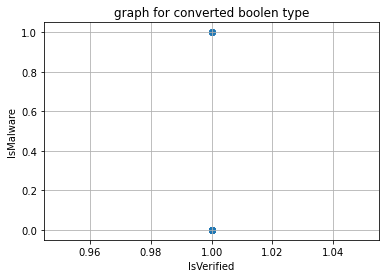

In [25]:
plt.scatter(data["IsVerified"],data["IsMalware"])
plt.xlabel('IsVerified')
plt.ylabel('IsMalware')
plt.title('graph for converted boolen type')
plt.grid()

plt.show()


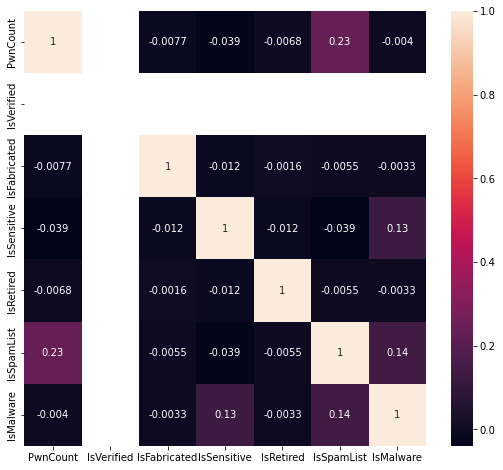

In [33]:


plt.figure(figsize=(9,8))
cor =df.corr()
sns.heatmap(cor, annot=True)
plt.show()